In [22]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
#from matplotlib.animation import FuncAnimation
#from celluloid import Camera
import matplotlib.cm as cm
from scipy.sparse import diags
#from scipy.sparse.linalg import eigsh
#import scipy
plt.rcParams.update({'font.size': 14})

def initf(x,Nx):
    mini = 1
    maxi = 2
    ini = np.zeros(Nx)
    for i in range(int(Nx/2)): 
        ini[i] = -(mini-maxi)/int(Nx/2)*i
        ini[i+int(Nx/2)] = (mini-maxi)/int(Nx/2)*i+mini
    ini /= sum(ini)*dx
    return ini#

def plotresult(x,cin,Nt,title):
    colorwave = cm.plasma(np.linspace(0, 1, Nt))
    #fig = plt.figure(figsize = (15,5) )
    fig, ax = plt.subplots(figsize=(7,5))
    ax2 = plt.subplot(1,1,1)
    for i in range(1,Nt):
        if i % int(Nt/20) == 0:
            plt.plot(x,cin[:,i],c=colorwave[i])
            plt.xlabel('space ')
            plt.ylabel('concentration c')
            plt.title(str(title))
    #data = np.linspace(0, dt*Nx, Nx).reshape(Nx, 1)
    #im = ax.imshow(data, cmap='plasma')
    #divider = make_axes_locatable(ax2)
    #cax = fig.add_axes([0.75, 0.2, 0.04, 0.2])
    #plt.colorbar(im, cax=cax)
    plt.title('Time evolution')
    plt.ylim([1.1*np.amin(cin[:,1:]),1.1*np.amax(cin[:,1:])])
    
    plt.tight_layout()  
    plt.savefig(str(title)+'.svg', format='svg')
    plt.show()

In this notebook the diffusion equation/heat equation is solved implicit and explicit.

## $$
\frac{\partial^2 u}{\partial t^2}=   \alpha \frac{\partial^2 u}{\partial x^2} 
$$

Initial parameters:

In [61]:
Nx = 1000                     #x steps
Nt = 1000                    #t steps
L = 6*np.pi#10                       #Length of the domain ([0,L])
T = 4                        #Stop time of the simulation
#Remark T should be smaller Nt/200 to get resonable results for the explicit method
# F < 1/2
alpha = 1                        #Diffusion coefficient

x = np.linspace(0, L, Nx)    #x space   
t = np.linspace(0, T, Nt)    #t space
dt = t[1]-t[0]               #t step
dx = x[1] - x[0]             #x step
F = alpha * dt**2/dx**2

# Explicit method - Forward Euler scheme

Space and time are descretized into:

### $x_{i}=i \Delta x, \: \: \: i = 0,...,N_x$
### $t_{n}=n \Delta t, \: \: \: n = 0,...,N_t$.

$u_i^n$ denotes the mesh function that approximates $u(x_i,t_n)$. The diffusion equation now needs to be fulfilled at every mesh point $(x_i,t_n)$. This leads to the equation:

### $\frac{\partial^2 }{\partial t^2} u\left ( x_{i},t_{n} \right ) = \alpha \frac{\partial^2 }{\partial x^2} u\left ( x_{i},t_{n} \right )$.

The derivatives are now replaced by finite difference approximations. The simplest method is to use forward difference in time and a central difference in space (which is equivalent to first perform forward difference and than backward difference in space):

----------------------
Remark: Derivation of $D_{x}^{-} D_{x}^{+}u$: 

### $D_{x}^{-} D_{x}^{+}u_{i}^{n} = D_{x}^{-} \frac{u_{i+1}^{n}-u_{i}^{n}}{\Delta x}=\frac{u_{i+1}^{n}-u_{i}^{n}-u_{i}^{n}+u_{i-1}^{n}}{\Delta x^{2}} =\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^{2}}$
-------------


### $\left [ D^{+}_{t} D^{-}_{t} u=\alpha D_{x}^{-} D_{x}^{+}u \right ]^{n}_{i}$.

This can be written as:

### $\frac{u^{n+1}_{i}-2u^{n}_{i}+u^{n-1}_{i}}{\Delta t^2} = \alpha \frac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{\Delta x^2}$

and than rearranged for $u^{n+1}_{i}$:

### $u^{n+1}_{i}=2u^{n}_{i} - u_{i} ^{n-1} + F\left ( u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1} \right )$,

where $F = \frac{\alpha \Delta t^2}{\Delta x^2}$. With that formula, the diffusion equation can be solved stepwise.

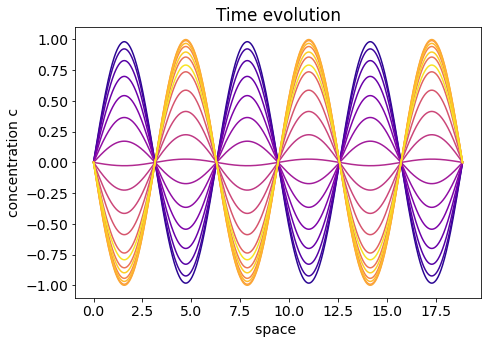

In [63]:
c = np.zeros((Nx,Nt))        #array to save the density distributions
c[:,0] = np.sin(x)#initf(x,Nx)
#c[:,1] = np.sin(x)#initf(x,Nx)

for i in range(1,Nx-1): c[i,1] = c[i,0] - 1/2*F*(c[i+1,0]-2*c[i,0]+c[i-1,0])
for n in range(1,Nt-1):
    for i in range(1,Nx-1):
        c[i,n+1] = 2*c[i,n] - c[i,n-1] + F*(c[i+1,n]-2*c[i,n]+c[i-1,n])
    c[0,n+1] = 0
    c[-1,n+1] = 0
    #c[0,n+1] = c[1,n+1]
    #c[-1,n+1] = c[-2,n+1]
    
plotresult(x,c,Nt,'Wave equation - Explicit method')